In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('Data/bank/bank.csv', sep=';') # Đọc dữ liệu, tách các thuộc tính bằng ";"
print('Shape =', raw_data.shape) # Dữ liệu có 4521 đối tượng, 16 thuộc tính và 1 thuộc tính phân lớp.
raw_data.info()
print(raw_data[:3])
raw_data.head()

Shape = (4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
   age         job  marital  education default  balance housing loan  \
0   30  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
from sklearn.preprocessing import LabelEncoder # Chuyển thuộc tính dạng category thành số.
def categoryToInt(data: pd.DataFrame):
    listAttrCate = ['job', 'marital', 'education', 'default', 'housing', 'month', 'loan', 'contact', 'poutcome', 'y']
    new_data = data.copy()
    LE = LabelEncoder()
    for attr in listAttrCate:
        new_data[attr] = LE.fit_transform(new_data[attr])
    return new_data

In [5]:
new_data = categoryToInt(raw_data)
# print('Job: ', set(raw_data['job'].tolist()))
# print('Job: ', set(new_data['job'].tolist()))
new_data.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,341,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,313,1,147,2,0,0


In [6]:
new_data.isnull().sum() # Kiểm tra dữ liệu null
# new_data.isna().sum()
## https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/55455380#:~:text=Up%20vote%203-,df.,wise%20sum%20of%20missing%20values.&text=This%20returns%20the%20counts%20of,number%20of%20entries%20per%20group.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
X = new_data.values[:,:-1]
y = new_data.values[:,-1:].flatten()# flatten copy còn ravel không copy
listAttrName = new_data.columns.tolist() # lấy danh sách tên thuộc tính (vẽ trong decision tree)
print('X[0]: ', *X[0])
print('len X[0]: ', len(X[0]))
print('Class 0: ', len(y[y==0])) # Dữ liệu có 4000 đối tượng nhãn 0 hay "no" và 521 đối tượng nhãn 1 hay "yes"
print('Class 1: ', len(y[y==1]))

X[0]:  30 10 1 0 0 1787 0 0 0 19 10 79 1 -1 0 3
len X[0]:  16
Class 0:  4000
Class 1:  521


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 4521 lấy 10% là test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('X_train[0] : ', *X_train[0])

(4068, 16)
(453, 16)
(4068,)
(453,)
X_train[0] :  40 4 1 0 0 733 1 0 2 6 6 94 7 -1 0 3


In [9]:
# Scale Standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print('X_train[0] : ', *X_train[0], sep='\t')

X_train[0] : 	-0.1154012157580415	-0.14082789681812635	-0.24903375694044508	-1.650660103899099	-0.125420640560687	-0.242531714283306	0.889983418149736	-0.424851891163768	1.5134421521065196	-1.2080038074650394	0.1600868920060264	-0.6541323513478711	1.3359825413136415	-0.40528188600836973	-0.3165179597123066	0.44240096279590924


In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred_logistic = model.predict(X_test)
# print('y_pred_logistic:\n', y_pred_logistic)
acc_score_logistic = metrics.accuracy_score(y_pred_logistic, y_test)
print('accuracy:\n', acc_score_logistic*100)

accuracy:
 10.596026490066226


accuracy:
 89.62472406181016


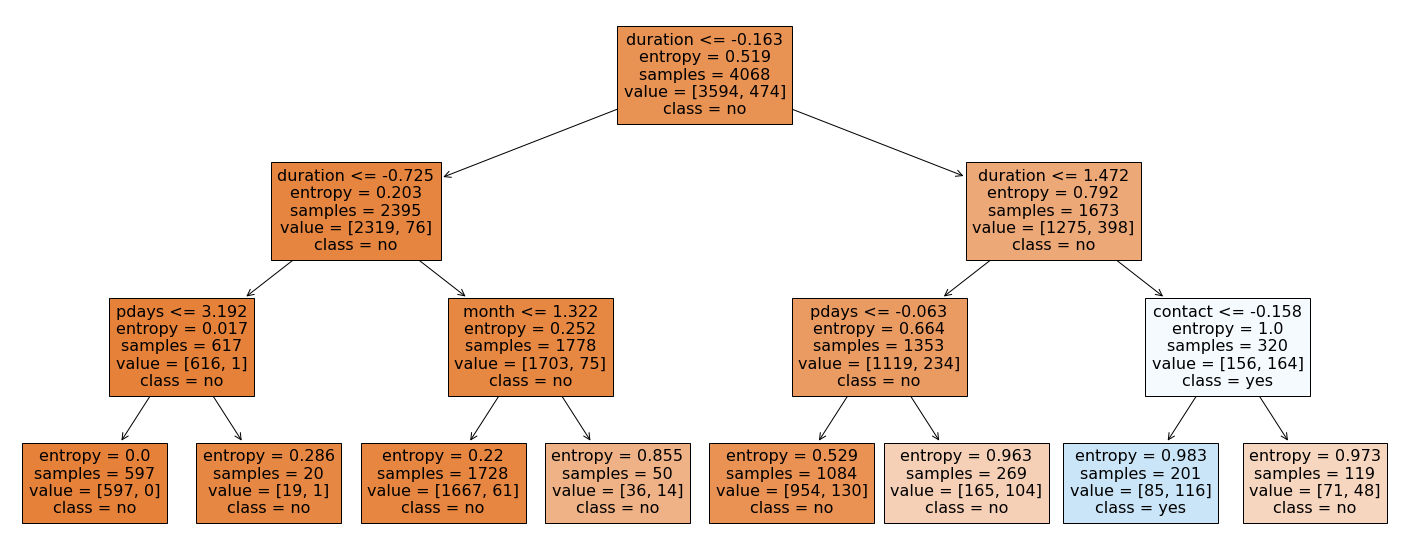

In [11]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = model.fit(X_train, y_train)
y_pred_dtree = model.predict(X_test)
print('accuracy:\n', metrics.accuracy_score(y_test, y_pred_dtree)*100)

# text_representation = tree.export_text(model)
# print(text_representation)

fig = plt.figure(figsize=(25,10))
# _ = tree.plot_tree(model, feature_names=listAttrName, class_names=True, filled=True)
_ = tree.plot_tree(model, feature_names=listAttrName, class_names=['no', 'yes'], filled=True)

In [13]:
#Phan loai voi KNN
from sklearn.neighbors import KNeighborsClassifier
k = 2
acc_score = 0
acc_score_after = 1
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
#     print('y_pred:\n', *y_pred)
#     print('y_true:\n', *y_test)

    #Tính accuracy
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)


accuracy:
 88.96247240618102
k =  2
accuracy:
 64.01766004415012
k =  3
accuracy:
 67.77041942604856
k =  4
accuracy:
 66.22516556291392
k =  5
accuracy:
 68.65342163355407
k =  6
accuracy:
 67.99116997792495
k =  7
accuracy:
 68.43267108167771
k =  8
accuracy:
 66.00441501103754
k =  9
accuracy:
 67.3289183222958
k =  10
accuracy:
 66.00441501103754
k =  11
accuracy:
 67.3289183222958
k =  12
accuracy:
 66.66666666666666
k =  13
accuracy:
 67.3289183222958
k =  14
accuracy:
 67.3289183222958
k =  15
y_pred:
 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0

In [14]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_NB = model.predict(X_test)
# print('y_pred:\n', *y_pred)
# print('y_true:\n', *y_test)
#Tính accuracy
acc_score = metrics.accuracy_score(y_pred_NB, y_test)
print('accuracy:\n', acc_score*100)

accuracy:
 50.11037527593819


In [ ]:
#svm
from sklearn import svm
from sklearn import metrics
svm_classifier = svm.SVC(kernel='linear', gamma=0.01, C=100.)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)
print('y_pred_svm:\n', *y_pred_svm)
print('y_true:\n', *y_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm, y_test)
print('accuracy:\n', acc_score_svm*100)